In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Cayan-Portela/ceub/main/dados/bank_customer_treino.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15765192,564,France,Male,26,7,84006.88,2,0,0,183490.99,0
1,15631882,688,Germany,Male,45,9,103399.87,1,0,0,129870.93,0
2,15777586,784,Spain,Female,42,2,109052.04,2,1,0,6409.55,0
3,15577107,657,Spain,Female,22,6,0.00,3,0,1,168412.07,1
4,15722731,653,France,Male,46,0,119556.10,1,1,0,78250.13,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       6000 non-null   int64  
 1   credit_score      6000 non-null   int64  
 2   country           6000 non-null   object 
 3   gender            6000 non-null   object 
 4   age               6000 non-null   int64  
 5   tenure            6000 non-null   int64  
 6   balance           6000 non-null   float64
 7   products_number   6000 non-null   int64  
 8   credit_card       6000 non-null   int64  
 9   active_member     6000 non-null   int64  
 10  estimated_salary  6000 non-null   float64
 11  churn             6000 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 562.6+ KB


In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.569114e+07,649.663333,39.089167,5.030000,76644.980005,1.534167,0.708333,0.515167,100500.871513,0.207000
std,7.188660e+04,96.865053,10.632045,2.887298,62508.348408,0.579271,0.454568,0.499812,57712.659638,0.405189
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.562817e+07,583.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51435.770000,0.000000
50%,1.569222e+07,651.000000,37.000000,5.000000,97692.980000,1.000000,1.000000,1.000000,100661.590000,0.000000
75%,1.575313e+07,717.000000,44.000000,8.000000,127582.337500,2.000000,1.000000,1.000000,150039.985000,0.000000
max,1.581566e+07,850.000000,88.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
df.shape

(6000, 12)

In [6]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<ipython-input-7-23f10524e163>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr = df.corr()


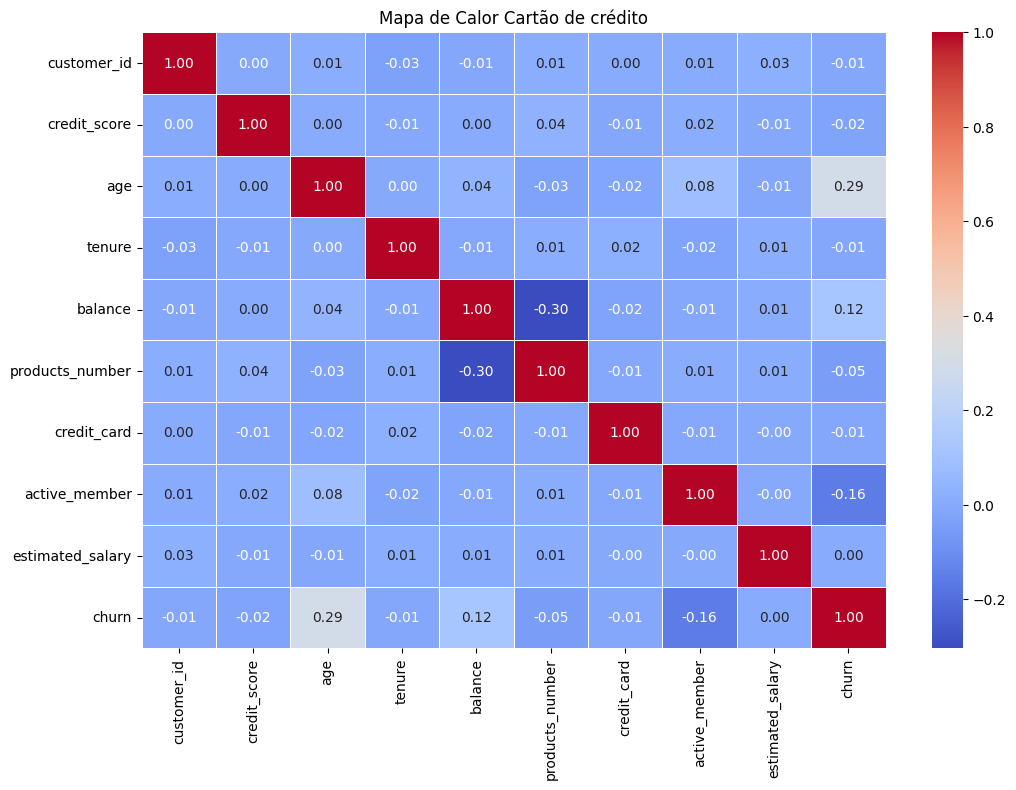

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

matriz_corr = df.corr()

plt.figure(figsize = (12, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor Cartão de crédito')

plt.show()

In [8]:
df = df.drop(columns=['customer_id', 'tenure', 'products_number'])
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})
df = pd.get_dummies(df, columns=['country'], prefix='country')
df.head()

,credit_score,gender,age,balance,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,564,1,26,84006.88,0,0,183490.99,0,1,0,0
1,688,1,45,103399.87,0,0,129870.93,0,0,1,0
2,784,0,42,109052.04,1,0,6409.55,0,0,0,1
3,657,0,22,0.00,0,1,168412.07,1,0,0,1
4,653,1,46,119556.10,1,0,78250.13,1,1,0,0


In [9]:
df = df.drop(columns=['country_France'])
df

,credit_score,gender,age,balance,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,564,1,26,84006.88,0,0,183490.99,0,0,0
1,688,1,45,103399.87,0,0,129870.93,0,1,0
2,784,0,42,109052.04,1,0,6409.55,0,0,1
3,657,0,22,0.00,0,1,168412.07,1,0,1
4,653,1,46,119556.10,1,0,78250.13,1,0,0
...,...,...,...,...,...,...,...,...,...,...
5995,615,1,42,0.00,0,1,120321.09,0,0,1
5996,669,0,35,0.00,1,1,49108.23,1,0,0
5997,461,0,40,0.00,1,0,176547.80,0,0,0
5998,765,1,36,92310.54,1,1,72924.56,0,1,0


In [10]:
from sklearn.preprocessing import StandardScaler
# Normalizando os dados
scaler = StandardScaler()
normalizar = ['credit_score', 'age', 'balance', 'estimated_salary']
df[normalizar] = scaler.fit_transform(df[normalizar])
df.head()

,credit_score,gender,age,balance,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,-0.884431,1,-1.231208,0.117784,0,0,1.438108,0,0,0
1,0.395807,1,0.555991,0.428057,0,0,0.508944,0,1,0
2,1.386959,0,0.273802,0.518487,1,0,-1.630477,0,0,1
3,0.075747,0,-1.607460,-1.226258,0,1,1.176810,1,0,1
4,0.034449,1,0.650055,0.686543,1,0,-0.385576,1,0,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Separando os dados em variáveis preditoras (X) e variável alvo (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Construindo o modelo SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [21]:
# Previsões (já feitas anteriormente)
y_pred = svm_model.predict(X_test)

class_report = classification_report(y_test, y_pred)

print("\nRelatório de Classificação:")
print(class_report)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       973
           1       0.76      0.24      0.36       227

    accuracy                           0.84      1200
   macro avg       0.80      0.61      0.64      1200
weighted avg       0.83      0.84      0.81      1200



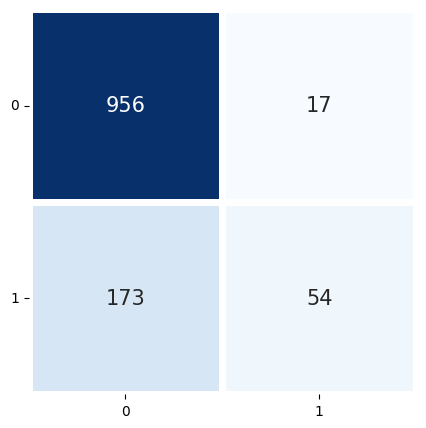

In [22]:
# Cria a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (5, 5))
sns.heatmap(conf_matrix, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.yticks(rotation = 0)
plt.show()